In [2]:


import numpy as np 
import pandas as pd 


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/google-stock-data/GOOGL.csv
/kaggle/input/google-stock-price-data/google stock data.csv


In [3]:

import os 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [4]:

data = pd.read_csv('/kaggle/input/google-stock-price-data/google stock data.csv', date_parser = True)
data.tail(20)

,Date,Open,High,Low,Close,Adj Close,Volume
4411,2022-02-25,2671.040039,2705.429932,2635.030029,2689.189941,2689.189941,1820300
4412,2022-02-28,2661.000000,2715.030029,2651.850098,2701.139893,2701.139893,1939400
4413,2022-03-01,2697.570068,2725.110107,2664.370117,2681.229980,2681.229980,1324800
4414,2022-03-02,2692.560059,2705.250000,2661.429932,2691.429932,2691.429932,1176000
4415,2022-03-03,2720.199951,2728.790039,2660.510010,2677.989990,2677.989990,1230200
4416,2022-03-04,2658.550049,2677.030029,2606.750000,2638.129883,2638.129883,1521500
4417,2022-03-07,2629.760010,2634.699951,2525.899902,2527.570068,2527.570068,2255600
4418,2022-03-08,2525.000000,2625.000000,2513.489990,2542.090088,2542.090088,2021400
4419,2022-03-09,2625.000000,2674.709961,2598.010010,2668.399902,2668.399902,1851300
4420,2022-03-10,2625.320068,2665.439941,2618.250000,2648.590088,2648.590088,1355100


In [5]:
data_training = data[data['Date']<'2019-0-01'].copy()
data_test = data[data['Date']>='2019-01-01'].copy()

In [6]:
data_training = data_training.drop(['Date', 'Adj Close'], axis = 1)
scaler = MinMaxScaler()
data_training = scaler.fit_transform(data_training)
data_training[0:5]

array([[3.27076291e-04, 9.36027567e-04, 0.00000000e+00, 1.33688677e-04,
        5.40710393e-01],
       [7.34916593e-04, 2.96140240e-03, 1.87022750e-03, 3.36247683e-03,
        2.73350337e-01],
       [4.66793067e-03, 4.73662871e-03, 5.39234743e-03, 3.80405377e-03,
        2.17265746e-01],
       [4.86579100e-03, 3.97812280e-03, 3.13489618e-03, 1.96887284e-03,
        1.80407138e-01],
       [2.32992613e-03, 2.52566301e-03, 3.26259872e-03, 2.42665690e-03,
        1.06185738e-01]])

In [7]:

X_train = []
y_train = []

In [8]:
for i in range(60, data_training.shape[0]):
    X_train.append(data_training[i-60:i])
    y_train.append(data_training[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [9]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout

/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:98: UserWarning: unable to load libtensorflow_io_plugins.so: unable to open file: libtensorflow_io_plugins.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io_plugins.so: undefined symbol: _ZN3tsl6StatusC1EN10tensorflow5error4CodeESt17basic_string_viewIcSt11char_traitsIcEENS_14SourceLocationE']
  warnings.warn(f"unable to load libtensorflow_io_plugins.so: {e}")
/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/__init__.py:104: UserWarning: file system plugins are not loaded: unable to open file: libtensorflow_io.so, from paths: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so']
caused by: ['/opt/conda/lib/python3.10/site-packages/tensorflow_io/python/ops/libtensorflow_io.so: undefined symbol: _ZTVN10tenso

In [10]:

model = Sequential()

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True, input_shape = (X_train.shape[1], 5)))
model.add(Dropout(0.2))

model.add(LSTM(units = 60, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 80, activation = 'relu', return_sequences = True))
model.add(Dropout(0.2))

model.add(LSTM(units = 120, activation = 'relu'))
model.add(Dropout(0.2))

model.add(Dense(units = 1))

In [18]:

model.compile(optimizer='adam', loss = 'mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)
data_test.head()

Epoch 1/50
112/112 [==============================] - 17s 112ms/step - loss: 0.0018
Epoch 2/50
112/112 [==============================] - 13s 114ms/step - loss: 0.0012
Epoch 3/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0013
Epoch 4/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0011
Epoch 5/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0011
Epoch 6/50
112/112 [==============================] - 13s 112ms/step - loss: 9.7842e-04
Epoch 7/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0011
Epoch 8/50
112/112 [==============================] - 12s 111ms/step - loss: 0.0010
Epoch 9/50
112/112 [==============================] - 12s 111ms/step - loss: 9.4983e-04
Epoch 10/50
112/112 [==============================] - 13s 113ms/step - loss: 0.0011
Epoch 11/50
112/112 [==============================] - 12s 111ms/step - loss: 8.6783e-04
Epoch 12/50
112/112 [==============================] - 13s 113

,Date,Open,High,Low,Close,Adj Close,Volume
3617,2019-01-02,1027.199951,1060.790039,1025.280029,1054.680054,1054.680054,1593400
3618,2019-01-03,1050.670044,1066.260010,1022.369995,1025.469971,1025.469971,2098000
3619,2019-01-04,1042.560059,1080.000000,1036.859985,1078.069946,1078.069946,2301100
3620,2019-01-07,1080.969971,1082.699951,1062.640015,1075.920044,1075.920044,2372300
3621,2019-01-08,1086.000000,1093.349976,1068.349976,1085.369995,1085.369995,1770700


In [12]:

data_training = data[data['Date']<'2019-01-01'].copy()

past_60_days = data_training.tail(60)

df = past_60_days.append(data_test, ignore_index = True)
df = df.drop(['Date', 'Adj Close'], axis = 1)
df.head()

/tmp/ipykernel_33/2241523932.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = past_60_days.append(data_test, ignore_index = True)


,Open,High,Low,Close,Volume
0,1205.030029,1205.900024,1163.849976,1177.069946,2328800
1,1176.000000,1182.000000,1154.319946,1167.829956,1592600
2,1160.000000,1175.859985,1135.400024,1155.920044,2309500
3,1151.310059,1161.550049,1144.170044,1145.170044,1684500
4,1136.400024,1137.020020,1091.510010,1092.160034,2949000


In [13]:
inputs = scaler.transform(df)
X_test = []
y_test = []

for i in range(60, inputs.shape[0]):
    X_test.append(inputs[i-60:i])
    y_test.append(inputs[i, 0])
X_test, y_test = np.array(X_test), np.array(y_test)
X_test.shape, y_test.shape

((814, 60, 5), (814,))

In [14]:
y_pred = model.predict(X_test)

26/26 [==============================] - 1s 32ms/step


In [15]:
scaler.scale_

array([8.06792972e-04, 8.06114202e-04, 8.23064254e-04, 8.09424979e-04,
       1.22503130e-08])

In [16]:
scale = 1/8.06792972e-04
scale

1239.475348330129

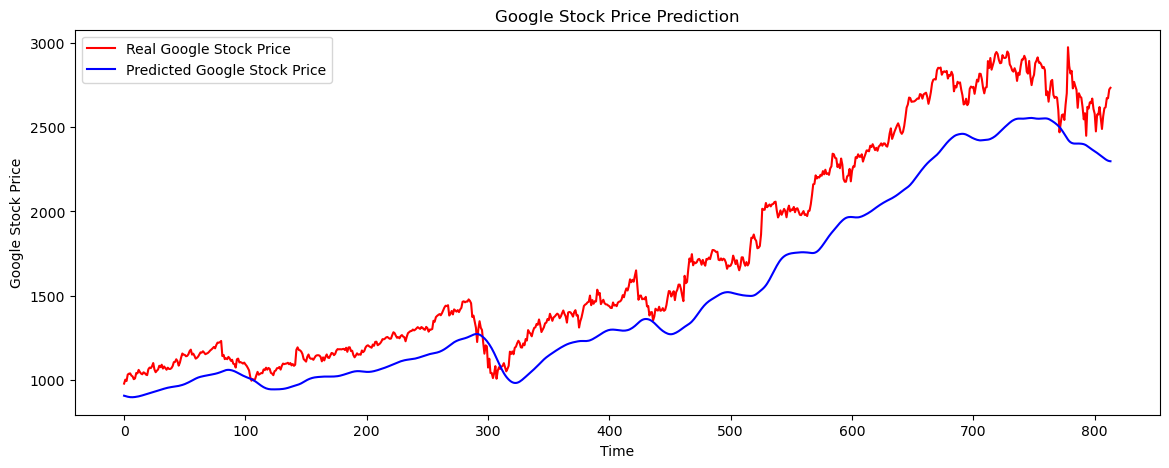

In [17]:

y_pred = y_pred*scale
y_test = y_test*scale
plt.figure(figsize=(14,5))
plt.plot(y_test, color = 'red', label = 'Real Google Stock Price')
plt.plot(y_pred, color = 'blue', label = 'Predicted Google Stock Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()